# Aug 21st, 2021

**Motivation**: SVINET cleaned up results, bootstrapping, binning <br>

In [1]:
# HIDE CODE


import os
import sys
import nibabel as nib
import networkx as nx
from time import time
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from myterial import orange, blue_grey
from IPython.display import display, IFrame, HTML
from matplotlib.colors import rgb2hex, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# set style & no interpolalation
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')


# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import load_allen, make_tree_graph
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.svinet import *
from utils.plotting import *
from utils.render import *
from model.mouse import Mice
from model.configuration import Config

# warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

## Mice

In [2]:
svinet_props = {
    'task': 'rest',
    'mode': 'bold',
    'metric': 'pearson',
    'match_metric': 'cosine',
    'graph_type': 'real',
}
mice = Mice(Config(128))
mice.combine_dfs(svinet_props.get('task', 'rest'), full=True)

k = 6
p = 20
figs_dir = [
    mice.cfg.results_dir,
    'SVINET',
    'figs_combined',
    '-'.join([
        f"{svinet_props.get('graph_type', 'real')}",
        f"p{p}",
        f"k{k}",
    ]),
]
figs_dir = pjoin(*figs_dir)
os.makedirs(figs_dir, exist_ok=True)
print(figs_dir)

/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/fi
gs_combined/real-p20-k6

## Align loaded fits using svinet.gam

In [3]:
svinet = SVINET(mice, k, p, 'sub-SLC')
output = align_svinet_group(mice, k, p, global_order=False, **svinet_props)
list(output)

current expt: 'p20'

Intel(R) oneAPI Data Analytics Library solvers for sklearn enabled: https://intelpython.github.io/daal4py/sklearn.html


['perms', 'gam', 'pi', 'gamma_all', 'svinet_all']

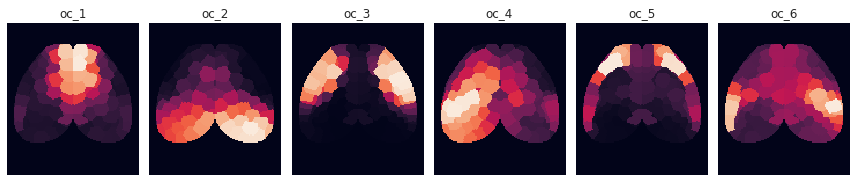

In [4]:
fig, axes = create_figure(1, k, (13.5, 4) if k == 7 else (12, 6))
gam_arr = svinet.pi2arr(output['gam'], cortex_only=True)
for ax, idx in zip(axes.ravel(), range(1, k + 1)):
    im = ax.imshow(gam_arr[idx], cmap='rocket', vmin=0)
    ax.set_title(f"oc_{idx}")
remove_ticks(axes)
plt.show()

  0%|          | 0/30 [00:00<?, ?it/s]

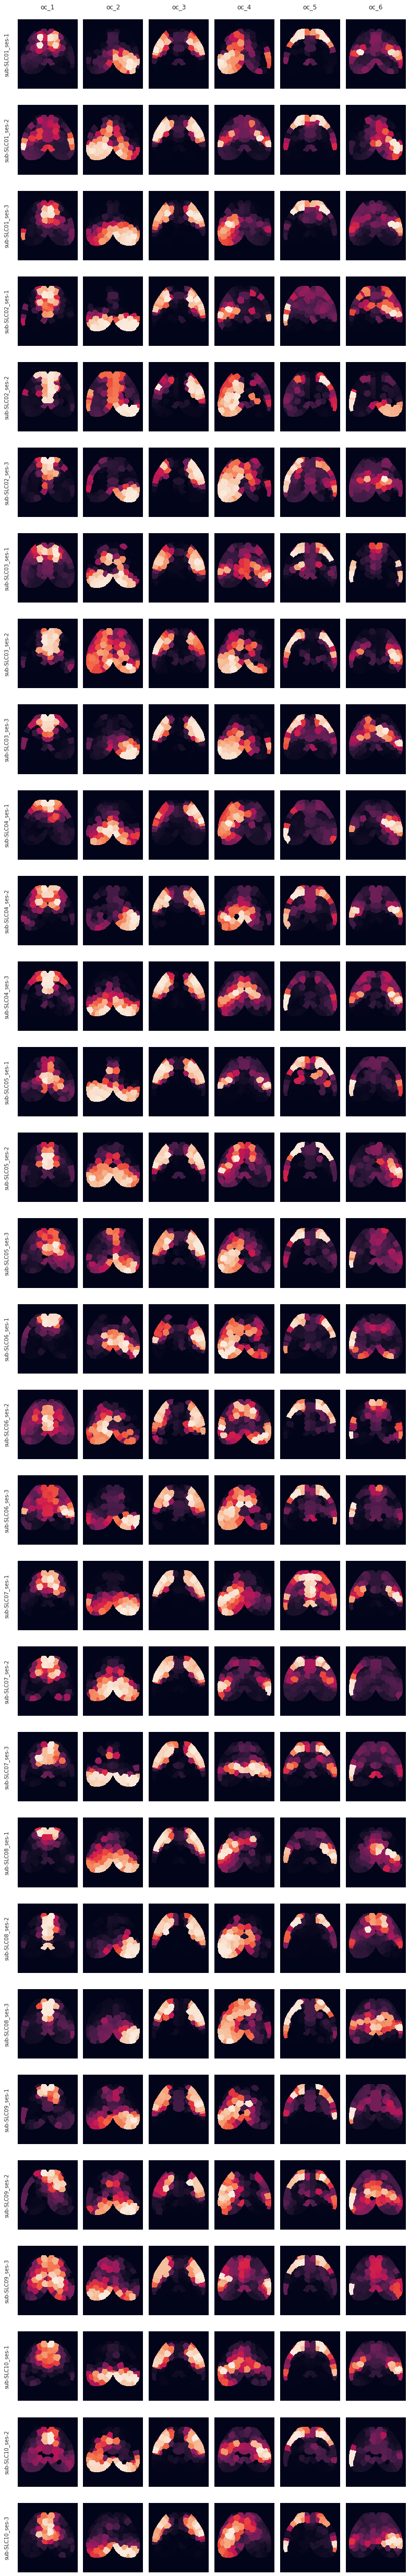

In [6]:
nrows = len(output['gamma_all'])
fig, axes = create_figure(nrows, k, (11, 2.3 * nrows))

for i, (key, gam) in tqdm(enumerate(output['gamma_all'].items()), total=nrows):
    gam_arr = svinet.pi2arr(gam, cortex_only=True)
    for j, idx in enumerate(range(1, k + 1)):
        im = axes[i, j].imshow(gam_arr[idx], cmap='rocket', vmin=0)
        # plt.colorbar(im, ax=axes[i, j], shrink=0.5)
        if i == 0:
            axes[i, j].set_title(f"oc_{idx}\n")
        if j == 0:
            axes[i, j].set_ylabel(f"{key}\n")
remove_ticks(axes)
plt.show()

  0%|          | 0/30 [00:00<?, ?it/s]

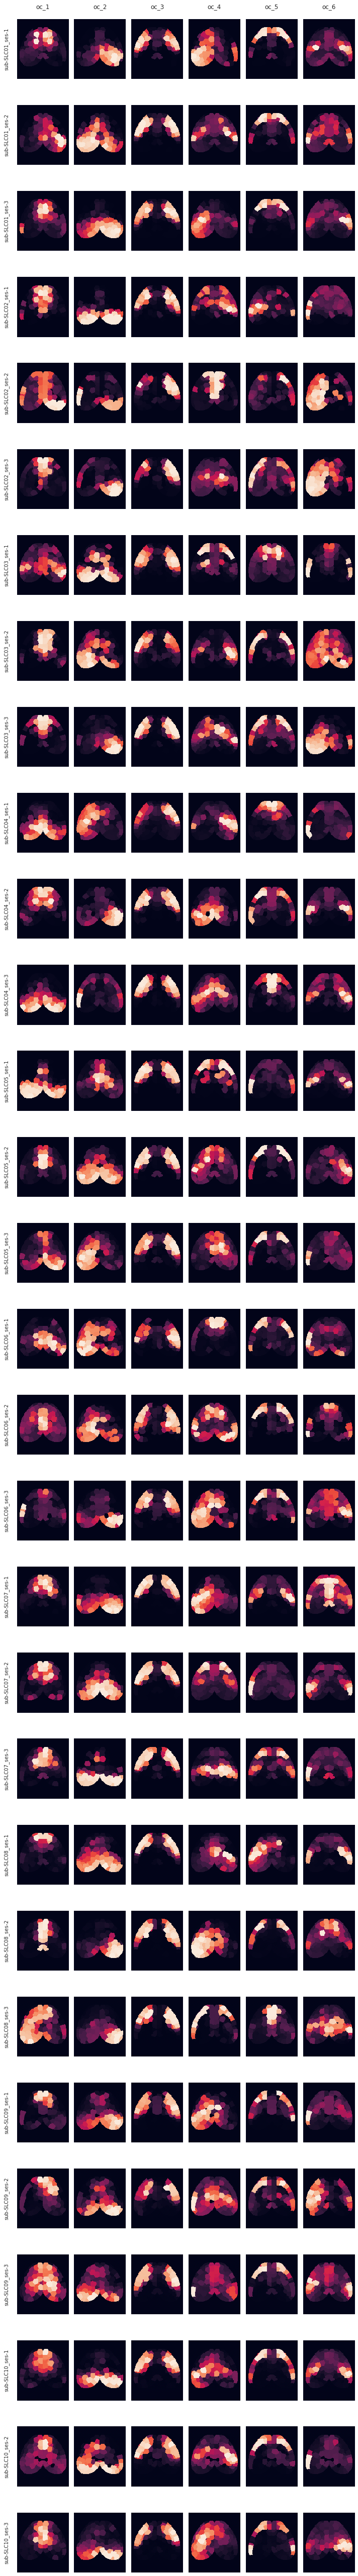

In [7]:
nrows = len(output['svinet_all'])
fig, axes = create_figure(nrows, k, (10, 2.4 * nrows))

for i, (key, sv) in tqdm(enumerate(output['svinet_all'].items()), total=nrows):
    gam_arr = svinet.pi2arr(sv.gam, cortex_only=True)
    for j, idx in enumerate(range(1, k + 1)):
        im = axes[i, j].imshow(gam_arr[idx], cmap='rocket', vmin=0)
        if i == 0:
            axes[i, j].set_title(f"oc_{idx}\n")
        if j == 0:
            axes[i, j].set_ylabel(f"{key}\n")
remove_ticks(axes)
plt.show()

In [5]:
output['perms']

{
    'sub-SLC01_ses-1': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5},
    'sub-SLC01_ses-2': {0: 5, 1: 1, 2: 2, 3: 3, 4: 4, 5: 0},
    'sub-SLC01_ses-3': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5},
    'sub-SLC02_ses-1': {0: 0, 1: 1, 2: 2, 3: 4, 4: 5, 5: 3},
    'sub-SLC02_ses-2': {0: 3, 1: 0, 2: 2, 3: 5, 4: 4, 5: 1},
    'sub-SLC02_ses-3': {0: 0, 1: 1, 2: 2, 3: 5, 4: 4, 5: 3},
    'sub-SLC03_ses-1': {0: 4, 1: 1, 2: 2, 3: 0, 4: 3, 5: 5},
    'sub-SLC03_ses-2': {0: 0, 1: 5, 2: 2, 3: 1, 4: 4, 5: 3},
    'sub-SLC03_ses-3': {0: 0, 1: 1, 2: 2, 3: 5, 4: 4, 5: 3},
    'sub-SLC04_ses-1': {0: 4, 1: 0, 2: 2, 3: 1, 4: 5, 5: 3},
    'sub-SLC04_ses-2': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5},
    'sub-SLC04_ses-3': {0: 4, 1: 0, 2: 2, 3: 3, 4: 1, 5: 5},
    'sub-SLC05_ses-1': {0: 1, 1: 0, 2: 2, 3: 5, 4: 3, 5: 4},
    'sub-SLC05_ses-2': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5},
    'sub-SLC05_ses-3': {0: 3, 1: 0, 2: 2, 3: 1, 4: 4, 5: 5},
    'sub-SLC06_ses-1': {0: 3, 1: 0, 2: 2, 3: 1, 4: 4, 5: 5},
    'sub-SLC06_ses-2': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5},
    'sub-SLC06_ses-3': {0: 5, 1: 1, 2: 2, 3: 3, 4: 4, 5: 0},
    'sub-SLC07_ses-1': {0: 0, 1: 1, 2: 2, 3: 3, 4: 5, 5: 4},
    'sub-SLC07_ses-2': {0: 0, 1: 1, 2: 2, 3: 5, 4: 3, 5: 4},
    'sub-SLC07_ses-3': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5},
    'sub-SLC08_ses-1': {0: 0, 1: 1, 2: 2, 3: 4, 4: 5, 5: 3},
    'sub-SLC08_ses-2': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5},
    'sub-SLC08_ses-3': {0: 4, 1: 1, 2: 2, 3: 0, 4: 3, 5: 5},
    'sub-SLC09_ses-1': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5},
    'sub-SLC09_ses-2': {0: 0, 1: 1, 2: 2, 3: 5, 4: 4, 5: 3},
    'sub-SLC09_ses-3': {0: 0, 1: 1, 2: 2, 3: 5, 4: 4, 5: 3},
    'sub-SLC10_ses-1': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5},
    'sub-SLC10_ses-2': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5},
    'sub-SLC10_ses-3': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
}

In [6]:
fix_idx = np.concatenate([
    np.array(list(v.values())).reshape(1, -1)
    for v in output['perms'].values()
])
_c = {}
for i in range(k):
    _c[i] = collections.Counter(fix_idx[:, i]).most_common()
_c

{
    0: [(0, 20), (4, 4), (3, 3), (5, 2), (1, 1)],
    1: [(1, 23), (0, 6), (5, 1)],
    2: [(2, 30)],
    3: [(3, 15), (5, 7), (1, 4), (4, 2), (0, 2)],
    4: [(4, 21), (5, 4), (3, 4), (1, 1)],
    5: [(5, 16), (3, 8), (4, 3), (0, 2), (1, 1)]
}

## BOOTSTRAP (light)

In [5]:
import re

def _extract_seed(x):
    x = next(e for e in str(x).split('-') if 'seed' in e)
    x = re.sub(r"\D", "", x)
    return int(x)

# find shared seeds
seed_counts = {}
seeds_shared = set(range(1, 1000 + 1))
for sub in mice.cfg.sub_ids:
    data_ses = []
    for ses in mice.cfg.ses_ids:
        key = mice.get_key(sub, ses)
        df = output['svinet_all'][key].pi_cut_df
        s = list(map(_extract_seed, df['run']))
        seed_counts[key] = len(set(s))
        seeds_shared.intersection_update(set(s))

In [6]:
rng = get_rng()
num_cuts = 10
bins = np.linspace(0, 1, num_cuts + 1)
intervals = pd.cut([], bins).value_counts().index
data_all = np.zeros((
    mice.cfg.num_subjects,
    mice.cfg.num_sessions,
    min(seed_counts.values()),
    k, num_cuts,
))
for key, sv in tqdm(output['svinet_all'].items()):
    sub, ses, _ = mice.looper[key]
    reord_ids = list(output['perms'][key].values())
    g = sv.gam_all[:, reord_ids, :]
    pi = g / g.sum(1, keepdims=True)
    seed_ids = rng.choice(len(pi), min(seed_counts.values()), False)
    pi = pi[seed_ids]
    for i in range(len(pi)):
        for j in range(k):
            mem_cut = pd.cut(np.round(pi[i, j], 2), bins)
            mem_cut = mem_cut.value_counts()
            counts = mem_cut.values
            portions = [c / sum(counts) for c in counts]
            data_all[sub - 1, ses - 1, i, j] = portions
data_all.shape

  0%|          | 0/30 [00:00<?, ?it/s]

(10, 3, 943, 6, 10)

In [11]:
file_name = f"cut-oc_bins-{num_cuts}"
save_obj(
    obj=data_all,
    file_name=file_name,
    save_dir=figs_dir,
    mode='npy',
)

[PROGRESS] 'cut-oc_bins-10.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/fi
gs_combined/real-p20-k6

'/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/figs_combined/real-p20-k6/cut-oc_bins-10.npy'

In [13]:
n_boot = int(1e4)
booted, real = bootstrap(data_all, n_boot, rng=rng)
booted, real = booted.astype(float), real.astype(float)
booted.shape

  0%|          | 0/10000 [00:00<?, ?it/s]

(10000, 6, 10)

In [20]:
file_name = f"booted-oc_bins-{num_cuts}_boot-{len(booted):1.0e}"
save_obj(
    obj=booted,
    file_name=file_name,
    save_dir=figs_dir,
    mode='npy',
)

[PROGRESS] 'booted-oc_bins-10_boot-1e+04.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/fi
gs_combined/real-p20-k6

'/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/figs_combined/real-p20-k6/booted-oc_bins-10_boot-1e+04.npy'

<AxesSubplot:xlabel='mean', ylabel='Density'>

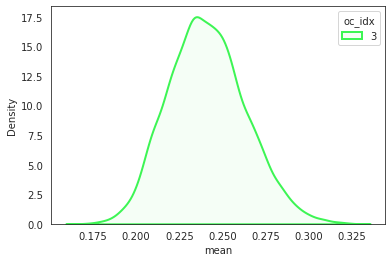

In [14]:
i = 2
j = 9

_df = pd.DataFrame({
    'interval': [intervals[j]] * len(booted),
    'oc_idx': [i + 1] * len(booted),
    'mean': booted[:, i, j],
})
sns.kdeplot(
    data=_df,
    x='mean',
    hue='oc_idx',
    fill=True,
    alpha=0.05,
    lw=2,
    palette=svinet.colors,
)

In [15]:
figs, sups = plot_bootstrap(figs_dir, booted, svinet.colors, [str(e) for e in intervals], 'hist')
figs, sups = plot_bootstrap(figs_dir, booted, svinet.colors, [str(e) for e in intervals], 'kde')

  0%|          | 0/4 [00:00<?, ?it/s]

/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/fi
gs_combined/real-p20-k6/hist_bins-10_boot-1e+04.pdf

done.

  0%|          | 0/4 [00:00<?, ?it/s]

/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/fi
gs_combined/real-p20-k6/kde_bins-10_boot-1e+04.pdf

done.

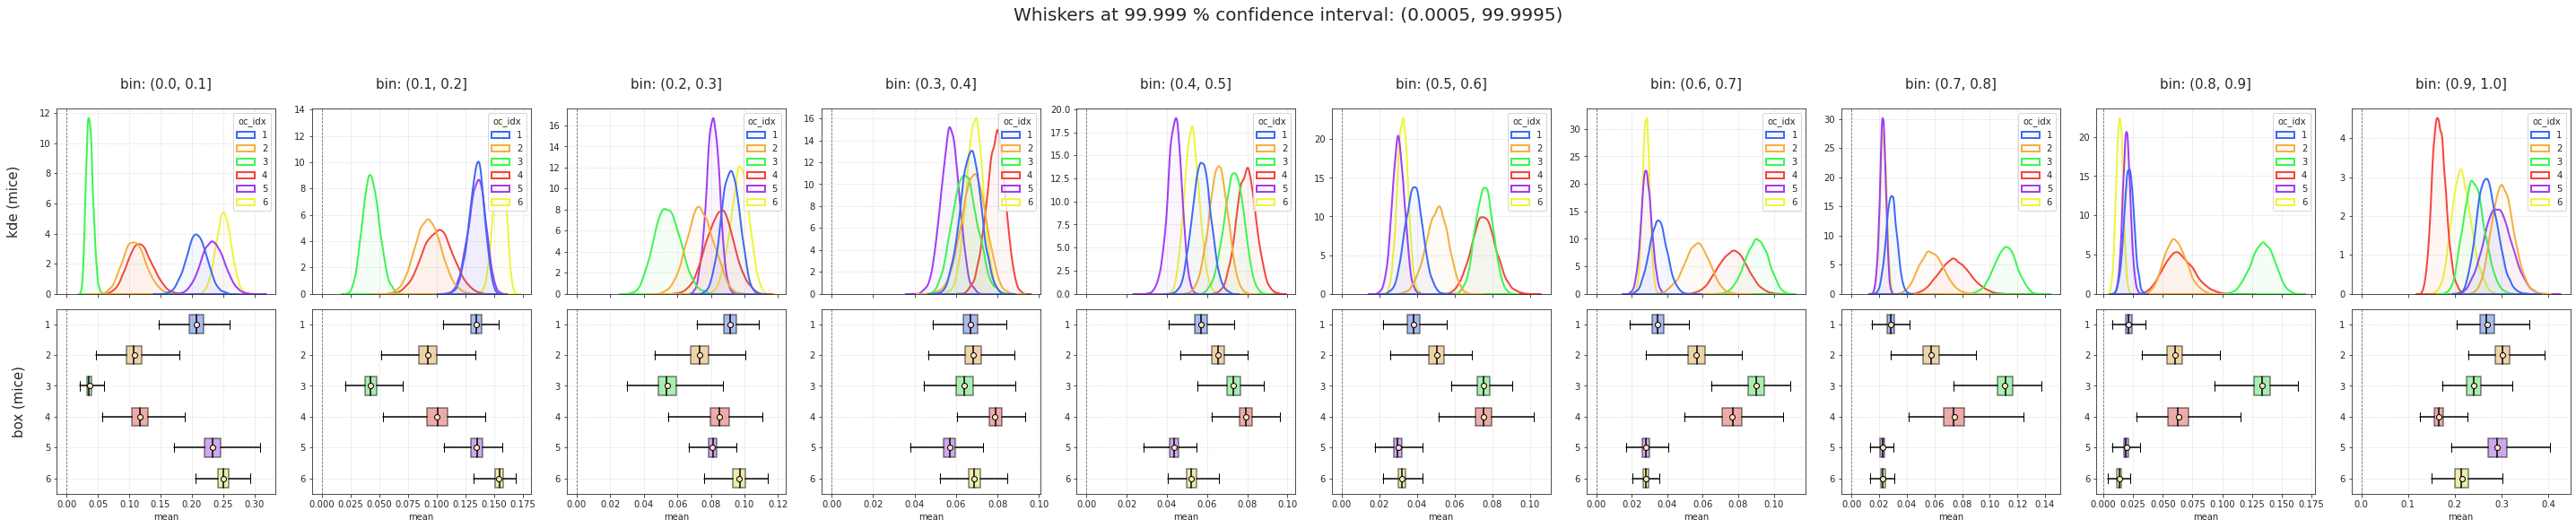

In [16]:
figs[-1]

In [21]:
[e for e in os.listdir(figs_dir) if 'npy' in e]

['cut-oc_bins-10.npy', 'booted-oc_bins-10_boot-1e+04.npy']

## SciPy Boot

In [22]:
my_statistic = get_statistic_fn(
    axis_sub=-1,
    axis_ses=0,
    axis_seed=1,
    keepdims=False,
    dtype=float,
)
n_resamples = 10000
batch = 2000
dlist = []
method = 'bca'
ci = 99.9
boot = sp_stats.bootstrap(
    data=(data_all,),
    statistic=my_statistic,
    confidence_level=ci/100,
    n_resamples=n_resamples,
    batch=batch,
    method=method,
    random_state=mice.cfg.random_state,
)

In [23]:
boot.standard_error

array([[0.01424201, 0.00535805, 0.00485735, 0.00397629, 0.00371928,
        0.00398988, 0.00439758, 0.00323872, 0.00352239, 0.01758454],
       [0.0140842 , 0.00833121, 0.00643357, 0.0053721 , 0.00357011,
        0.00438428, 0.00472382, 0.00674219, 0.00695908, 0.01871863],
       [0.00456345, 0.00624264, 0.0064267 , 0.00481555, 0.00445535,
        0.00376705, 0.00486817, 0.00616496, 0.00734718, 0.0202638 ],
       [0.0125659 , 0.00912745, 0.00617892, 0.00351437, 0.00341073,
        0.00406372, 0.00505067, 0.00854501, 0.00985853, 0.01118936],
       [0.01645829, 0.00670721, 0.00240115, 0.00281473, 0.00250767,
        0.00234332, 0.00206258, 0.00150486, 0.00231202, 0.02660409],
       [0.01027638, 0.00328249, 0.0036399 , 0.00219623, 0.00239537,
        0.00183878, 0.00151675, 0.00204267, 0.0022742 , 0.01402824]])

In [24]:
100 * (1 - 0.05 / 6)

99.16666666666667

In [27]:
boot.confidence_interval

ConfidenceInterval(low=array([[0.16299788, 0.11439128, 0.07537326, 0.05456608, 0.04340583,
        0.02504375, 0.02176093, 0.01916549, 0.01078964, 0.2278044 ],
       [0.06491725, 0.06595956, 0.05403557, 0.04996249, 0.05499547,
        0.03282023, 0.04093808, 0.04026682, 0.04028609, 0.25489541],
       [0.0247164 , 0.02605457, 0.03580494, 0.04957356, 0.05540866,
        0.06397393, 0.07346311, 0.09000358, 0.10071379, 0.18968931],
       [0.08005183, 0.0722386 , 0.06812345, 0.06505508, 0.06937702,
        0.06241593, 0.06049158, 0.05238466, 0.03724037, 0.14488182],
       [0.17997978, 0.11064514, 0.07418794, 0.04728167, 0.03266405,
        0.02248267, 0.02085926, 0.01799767, 0.0105893 , 0.20600311],
       [0.21356707, 0.14234903, 0.08646321, 0.06221028, 0.04551402,
        0.02717492, 0.02391779, 0.01620615, 0.00533432, 0.1767775 ]]), high=array([[0.25374534, 0.14926265, 0.10515378, 0.07872001, 0.06680032,
        0.04986906, 0.04949074, 0.03936925, 0.032732  , 0.33762556],
       [0.1501238 , 0.11857895, 0.09489875, 0.08547422, 0.077294  ,
        0.06057464, 0.06980939, 0.0824857 , 0.08383312, 0.37692558],
       [0.05402637, 0.06673029, 0.07587693, 0.07968841, 0.08357547,
        0.08850651, 0.10464581, 0.13075589, 0.15078943, 0.31800211],
       [0.1571642 , 0.12974104, 0.10914885, 0.08733478, 0.0901859 ,
        0.08799022, 0.09096075, 0.1046824 , 0.09754219, 0.21083274],
       [0.28610653, 0.15097906, 0.09028617, 0.06519387, 0.04795752,
        0.03673529, 0.03402107, 0.02758909, 0.02511773, 0.3743306 ],
       [0.27717635, 0.16383072, 0.10909534, 0.0754608 , 0.06126973,
        0.03929939, 0.03313063, 0.0293177 , 0.01948093, 0.26717647]]))

array([[0.01424201, 0.00535805, 0.00485735, 0.00397629, 0.00371928,
        0.00398988, 0.00439758, 0.00323872, 0.00352239, 0.01758454],
       [0.0140842 , 0.00833121, 0.00643357, 0.0053721 , 0.00357011,
        0.00438428, 0.00472382, 0.00674219, 0.00695908, 0.01871863],
       [0.00456345, 0.00624264, 0.0064267 , 0.00481555, 0.00445535,
        0.00376705, 0.00486817, 0.00616496, 0.00734718, 0.0202638 ],
       [0.0125659 , 0.00912745, 0.00617892, 0.00351437, 0.00341073,
        0.00406372, 0.00505067, 0.00854501, 0.00985853, 0.01118936],
       [0.01645829, 0.00670721, 0.00240115, 0.00281473, 0.00250767,
        0.00234332, 0.00206258, 0.00150486, 0.00231202, 0.02660409],
       [0.01027638, 0.00328249, 0.0036399 , 0.00219623, 0.00239537,
        0.00183878, 0.00151675, 0.00204267, 0.0022742 , 0.01402824]])

In [29]:
file_name = f"scipy-boot-oc_bins-{num_cuts}_boot-{n_resamples:1.0e}"
save_obj(
    obj={
        'se': boot.standard_error,
        'ci_low': boot.confidence_interval.low,
        'ci_high': boot.confidence_interval.high,},
    file_name=file_name,
    save_dir=figs_dir,
    mode='npy',
)

[PROGRESS] 'scipy-boot-oc_bins-10_boot-1e+04.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/fi
gs_combined/real-p20-k6

'/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/figs_combined/real-p20-k6/scipy-boot-oc_bins-10_boot-1e+04.npy'

In [274]:
dlist1, dlist2 = [], []
for i in range(k):
    for j, intvl in enumerate(intervals):
        dlist1.append({
            'condition': ['real'] * len(real_sample),
            'interval': [intvl] * len(real_sample),
            'oc_idx': [i + 1] * len(real_sample),
            'mean': real_sample[:, i, j],
        })
        dlist2.append({
            'condition': ['boot'] * len(booted),
            'interval': [intvl] * len(booted),
            'oc_idx': [i + 1] * len(booted),
            'mean': booted[:, i, j],
        })
df_real = pd.DataFrame(merge_dicts(dlist1))
df_boot = pd.DataFrame(merge_dicts(dlist2))

t = abs(sp_stats.t.ppf(0.75, mice.cfg.num_subjects - 1))
q1 = real[0] - boot.standard_error * t
q3 = real[0] - boot.standard_error * t

dlist = []
ci_all = [95, 99.99, 99.999, 100 * (1 - 0.05 / 6)]
for ci in sorted(ci_all):
    p = np.round(1 - ci / 100, 13)
    t = abs(sp_stats.t.ppf(1 - p, mice.cfg.num_subjects - 1))
    low = real[0] - boot.standard_error * t
    high = real[0] + boot.standard_error * t
    for i in range(k):
        for j, intvl in enumerate(intervals):
            _res = {
                'low': low[i, j],
                'Q1': q1[i, j],
                'Q3': q3[i, j],
                'high': high[i, j],
            }
            dlist.append({
                'p': [p] * len(_res),
                't': [t] * len(_res),
                'ci': [ci] * len(_res),
                'oc_idx': [i + 1] * len(_res),
                'interval': [intvl] * len(_res),
                'label': _res.keys(),
                'value': _res.values(),
            })
df_t = pd.DataFrame(merge_dicts(dlist))

In [275]:
df_t.loc[df_t.interval == intervals[-1]]

,p,t,ci,oc_idx,interval,label,value
36,0.05000,1.833113,95.000,1,"(0.9, 1.0]",low,0.237742
37,0.05000,1.833113,95.000,1,"(0.9, 1.0]",Q1,0.257619
38,0.05000,1.833113,95.000,1,"(0.9, 1.0]",Q3,0.257619
39,0.05000,1.833113,95.000,1,"(0.9, 1.0]",high,0.302211
76,0.05000,1.833113,95.000,2,"(0.9, 1.0]",low,0.268470
...,...,...,...,...,...,...,...
919,0.00001,8.102058,99.999,5,"(0.9, 1.0]",high,0.507092
956,0.00001,8.102058,99.999,6,"(0.9, 1.0]",low,0.101344
957,0.00001,8.102058,99.999,6,"(0.9, 1.0]",Q1,0.205144
958,0.00001,8.102058,99.999,6,"(0.9, 1.0]",Q3,0.205144


In [327]:
from matplotlib.path import Path

def modify_box(ax, q, axis='x'):
    children = ax.get_children()
    # fix box
    pathpatch = children[6]
    path = pathpatch.get_path()
    vertices = path.vertices.copy()
    vertices[0, 0 if axis == 'x' else 1] = q[1]
    vertices[1, 0 if axis == 'x' else 1] = q[1]
    vertices[2, 0 if axis == 'x' else 1] = q[2]
    vertices[3, 0 if axis == 'x' else 1] = q[2]
    vertices[4, 0 if axis == 'x' else 1] = q[2]
    pathpatch.set_path(Path(vertices, path.codes))
    # fix arms
    children[0].set(**{'xdata' if axis == 'x' else 'ydata': (q[1], q[0])})
    children[1].set(**{'xdata' if axis == 'x' else 'ydata': (q[2], q[3])})
    children[2].set(**{'xdata' if axis == 'x' else 'ydata': (q[0], q[0])})
    children[3].set(**{'xdata' if axis == 'x' else 'ydata': (q[3], q[3])})
    return ax

In [328]:
x = rng.random(10000)
q = [2.5, 25, 50, 75, 97.5]
q = [-0.9, -0.25, 0.25, 0.75]

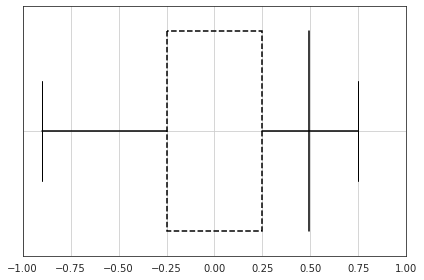

In [329]:
props = {
    'boxprops': {'color': 'none', 'edgecolor': 'k', 'ls': '--'},
    'medianprops': {'color': 'k'},
    'whiskerprops': {'color': 'k'},
    'capprops': {'color': 'k', 'linewidth': 1},
    'flierprops': {'alpha': 0.5, 'zorder': 1},
}

fig, ax = create_figure()
sns.boxplot(x, ax=ax, **props)
ax.set_xlim(-1, 1)
_ = modify_box(ax, q)
ax.grid()
plt.show()

In [371]:
def plot_last_bin(
        save_dir: str,
        booted: np.ndarray,
        df_real: pd.DataFrame,
        standard_error: np.ndarray,
        colors: Dict[int, str],
        dist_names: List[str] = None,
        method: str = 'bca',
        figsize=(13, 9.5),
        ci: float = 99.9, ):
    from fitter import Fitter
    props = {
        'boxprops': {'color': 'none', 'edgecolor': 'k', 'linewidth': 1, 'ls': '--'},
        'medianprops': {'color': 'k', 'linewidth': 1.3},
        'whiskerprops': {'color': 'k', 'linewidth': 1},
        'capprops': {'color': 'k', 'linewidth': 1},
    }
    meanprops = {
        "marker": "o",
        "markerfacecolor": "white",
        "markeredgecolor": "k",
        "markersize": "10",
    }
    dist_names = dist_names if dist_names else ['beta', 't']
    ci_low = np.round((100 - ci) / 2, 10)
    ci_high = np.round(100 - ci_low, 10)

    intervals = df_real.interval.unique()
    k = len(df_real.oc_idx.unique())
    nrows = 2
    ncols = int(np.ceil(k / nrows))
    fig, axes = create_figure(
        nrows=nrows,
        ncols=ncols,
        figsize=figsize,
        style='ticks',
    )
    axes_twin = np.empty_like(axes)
    for i, ax in enumerate(axes.ravel()):
        f = Fitter(
            data=booted[:, i, -1],
            distributions=dist_names,
            bins=500,
            timeout=1000,
        )
        f.fit(progress=False)
        for _d in dist_names:
            pdf = make_pdf(
                dist=_d,
                params=f.fitted_param[_d],
                whis=(ci_low / 100, ci_high / 100),
                size=10000,
            )
            ax.plot(
                list(pdf.index),
                list(pdf.values),
                color='r' if _d == 't' else 'k',
                lw=1.5,
                label=_d,
            )
        ax.legend(loc='upper right')
        sns.histplot(
            booted[:, i, -1],
            color=colors[i + 1],
            stat='density',
            alpha=0.6,
            ax=ax,
        )
        ax.grid(ls=':')
        ax.set_title(f"OC{i + 1}")
        if i // ncols == nrows - 1:
            ax.set_xlabel('mean portion')
        else:
            ax.set_xlabel('')

        ax_tx = ax.twinx()
        _df = df_real.loc[
            (df_real.oc_idx == i + 1) &
            (df_real.interval == intervals[-1])
            ]
        sns.boxplot(
            data=_df,
            x='mean',
            showmeans=True,
            meanprops=meanprops,
            showfliers=False,
            orient='h',
            width=0.15,
            ax=ax_tx,
            **props,
        )
        ax_tx.set_ylim((0.15, -1.0))
        
        # modify box
        real = _df['mean'].mean()
        # quartiles
        t = abs(sp_stats.t.ppf(0.75, len(_df) - 1))
        q1 = real - boot.standard_error[i, -1] * t
        q3 = real + boot.standard_error[i, -1] * t
        # whiskers
        t = abs(sp_stats.t.ppf(ci / 100, len(_df) - 1))
        low = real - boot.standard_error[i, -1] * t
        high = real + boot.standard_error[i, -1] * t
        ax_tx = modify_box(ax_tx, [low, q1, q3, high], 'x')
        axes_twin.ravel()[i] = ax_tx
        
        # change xlim
        xlim = ax.get_xlim()
        if xlim[0] > low - 0.01:
            xlim = (low - 0.01, xlim[1])
        if xlim[1] < high + 0.01:
            xlim = (xlim[0], high + 0.01)
        ax.set_xlim(xlim)

    plt.draw()
    for ax in axes.ravel():
        ax.set_xticklabels([
            np.round(float(e.get_text()), 2)
            for e in ax.get_xticklabels()
        ])

    msg = f"ci = {ci} %  whiskers: [{ci_low}, {ci_high}]   -   method: {method}\n"
    msg += "median and mean (white circle): 'actual' sample\n"
    msg += "whiskers, caps, hist: 'bootstrapped' samples"
    sup = fig.suptitle(msg, fontsize=17, y=1.05)

    save_file = [
        f"last-bin-{method}",
        f"bins-{len(intervals)}",
        f"boot-{len(booted):1.0e}",
    ]
    save_file = f"{'_'.join(save_file)}.pdf"
    save_file = pjoin(save_dir, save_file)
    print(save_file)
    save_fig(
        fig=fig,
        sup=sup,
        save_file=save_file,
        display=False,
        multi=False,
    )
    print('done.')
    return fig, axes, axes_twin

In [372]:
fig, axes, axes_twin = plot_last_bin(figs_dir, booted, df_real, boot.standard_error, svinet.colors, ci=99.9)

/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/fi
gs_combined/real-p20-k6/last-bin-bca_bins-10_boot-1e+04.pdf

done.

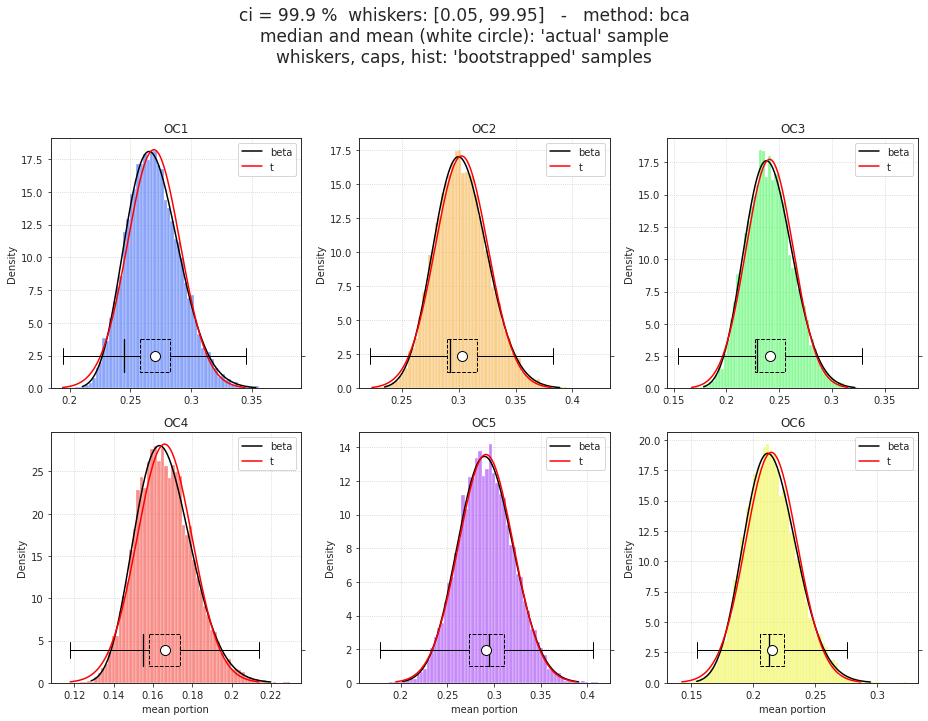

In [373]:
fig

In [368]:
def plot_last_bin(
        save_dir: str,
        booted: np.ndarray,
        df_real: pd.DataFrame,
        df_boot: pd.DataFrame,
        colors: Dict[int, str],
        method='percentile',
        dist_names: List[str] = None,
        figsize=(13, 9.5),
        ci: float = 99.9, ):
    from fitter import Fitter
    props_boot = {
        'boxprops': {'color': 'none', 'edgecolor': 'k', 'linewidth': 1},
        'medianprops': {'color': 'none', 'linewidth': 0},
        'whiskerprops': {'color': 'k', 'linewidth': 1},
        'capprops': {'color': 'k', 'linewidth': 1},
        'flierprops': {'alpha': 0.5, 'zorder': 1},
    }
    props_real = {
        'boxprops': {'color': 'none', 'edgecolor': 'none', 'linewidth': 0},
        'medianprops': {'color': 'k', 'linewidth': 1.5},
        'whiskerprops': {'color': 'none', 'linewidth': 0},
        'capprops': {'color': 'none', 'linewidth': 0},
        'flierprops': {'alpha': 0.7, 'zorder': 1},
    }
    meanprops = {
        "marker": "o",
        "markerfacecolor": "white",
        "markeredgecolor": "k",
        "markersize": "10",
    }
    dist_names = dist_names if dist_names else ['beta', 't']
    ci_low = np.round((100 - ci) / 2, 10)
    ci_high = np.round(100 - ci_low, 10)

    intervals = df_real.interval.unique()
    k = len(df_real.oc_idx.unique())
    nrows = 2
    ncols = int(np.ceil(k / nrows))
    fig, axes = create_figure(
        nrows=nrows,
        ncols=ncols,
        figsize=figsize,
        style='ticks',
    )
    for i, ax in enumerate(axes.ravel()):
        f = Fitter(
            data=booted[:, i, -1],
            distributions=dist_names,
            bins=500,
            timeout=1000,
        )
        f.fit(progress=False)
        for _d in dist_names:
            pdf = make_pdf(
                dist=_d,
                params=f.fitted_param[_d],
                whis=(ci_low / 100, ci_high / 100),
                size=10000,
            )
            ax.plot(
                list(pdf.index),
                list(pdf.values),
                color='r' if _d == 't' else 'k',
                lw=1.5,
                label=_d,
            )
        ax.legend(loc='upper right')
        sns.histplot(
            booted[:, i, -1],
            color=colors[i + 1],
            stat='density',
            alpha=0.6,
            ax=ax,
        )
        ax.grid(ls=':')
        ax.set_title(f"OC{i + 1}")

        ax_tx = ax.twinx()
        _df = df_boot.loc[
            (df_boot.oc_idx == i + 1) &
            (df_boot.interval == intervals[-1])
            ]
        sns.boxplot(
            data=_df,
            x='mean',
            whis=(ci_low, ci_high),
            showfliers=True,
            orient='h',
            width=0.15,
            ax=ax_tx,
            **props_boot,
        )

        _df = df_real.loc[
            (df_real.oc_idx == i + 1) &
            (df_real.interval == intervals[-1])
            ]
        sns.boxplot(
            data=_df,
            x='mean',
            showmeans=True,
            meanprops=meanprops,
            showfliers=True,
            orient='h',
            width=0.15,
            ax=ax_tx,
            **props_real,
        )
        ax_tx.set_ylim((0.15, -1.0))
        if i // ncols == nrows - 1:
            ax.set_xlabel('mean portion')
        else:
            ax.set_xlabel('')
    plt.draw()
    for ax in axes.ravel():
        ax.set_xticklabels([
            np.round(float(e.get_text()), 2)
            for e in ax.get_xticklabels()
        ])

    msg = f"ci = {ci} %  whiskers: [{ci_low}, {ci_high}]   -   method: {method}\n"
    msg += "median and mean (white circle): 'actual' sample\n"
    msg += "whiskers, caps, hist: 'bootstrapped' samples"
    sup = fig.suptitle(msg, fontsize=17, y=1.05)

    save_file = [
        f"last-bin-{method}",
        f"bins-{len(intervals)}",
        f"boot-{len(booted):1.0e}",
    ]
    save_file = f"{'_'.join(save_file)}.pdf"
    save_file = pjoin(save_dir, save_file)
    print(save_file)
    save_fig(
        fig=fig,
        sup=sup,
        save_file=save_file,
        display=False,
        multi=False,
    )
    print('done.')
    return fig, axes

In [369]:
fig, axes = plot_last_bin(figs_dir, booted, df_real, df_boot, svinet.colors, ci=99.9)

/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/fi
gs_combined/real-p20-k6/last-bin-percentile_bins-10_boot-1e+04.pdf

done.

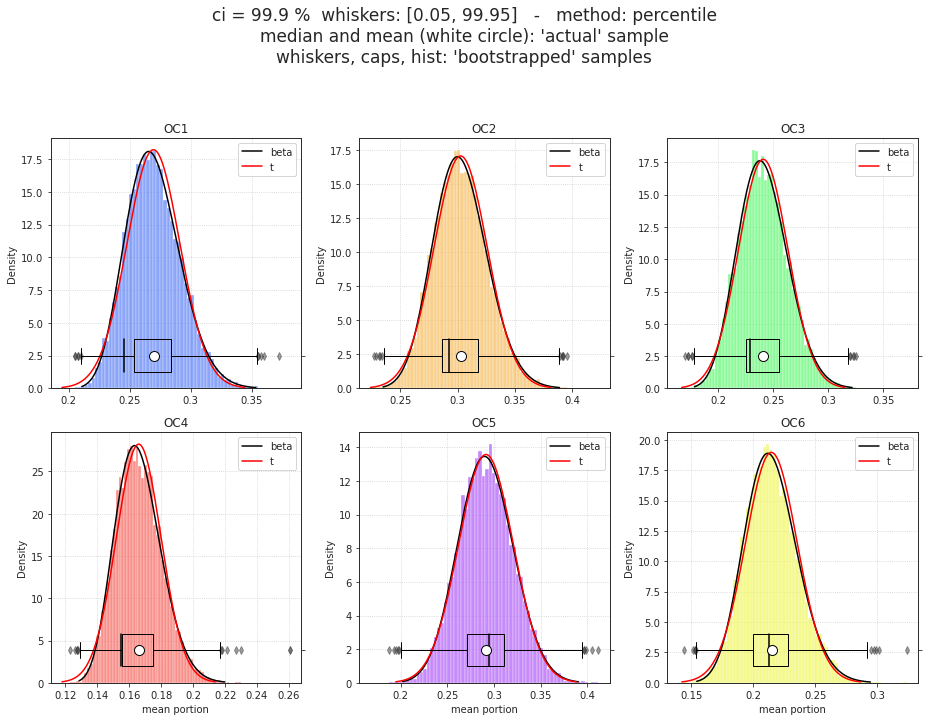

In [370]:
fig

## New, correct Fig

In [17]:
real_sample = np.median(data_all, axis=2).mean(1, dtype='float128')
real_sample.shape, booted.shape, real.shape, data_all.shape

((10, 6, 10), (10000, 6, 10), (1, 6, 10), (10, 3, 943, 6, 10))

In [18]:
dlist1, dlist2 = [], []
for i in range(k):
    for j, intvl in enumerate(intervals):
        dlist1.append({
            'condition': ['real'] * len(real_sample),
            'interval': [intvl] * len(real_sample),
            'oc_idx': [i + 1] * len(real_sample),
            'mean': real_sample[:, i, j],
        })
        dlist2.append({
            'condition': ['boot'] * len(booted),
            'interval': [intvl] * len(booted),
            'oc_idx': [i + 1] * len(booted),
            'mean': booted[:, i, j],
        })
df_real = pd.DataFrame(merge_dicts(dlist1))
df_boot = pd.DataFrame(merge_dicts(dlist2))
df_real.shape, df_boot.shape

((600, 4), (600000, 4))

In [21]:
figs, sups = plot_group(figs_dir, df_real, df_boot, figsize=(13.5, 11.3))

  0%|          | 0/4 [00:00<?, ?it/s]

/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/fi
gs_combined/real-p20-k6/group_bins-10_boot-1e+04.pdf

done.

In [26]:
fig, axes = plot_last_bin(figs_dir, booted, df_real, df_boot, svinet.colors)

/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/fi
gs_combined/real-p20-k6/last-bin_bins-10_boot-1e+04.pdf

done.

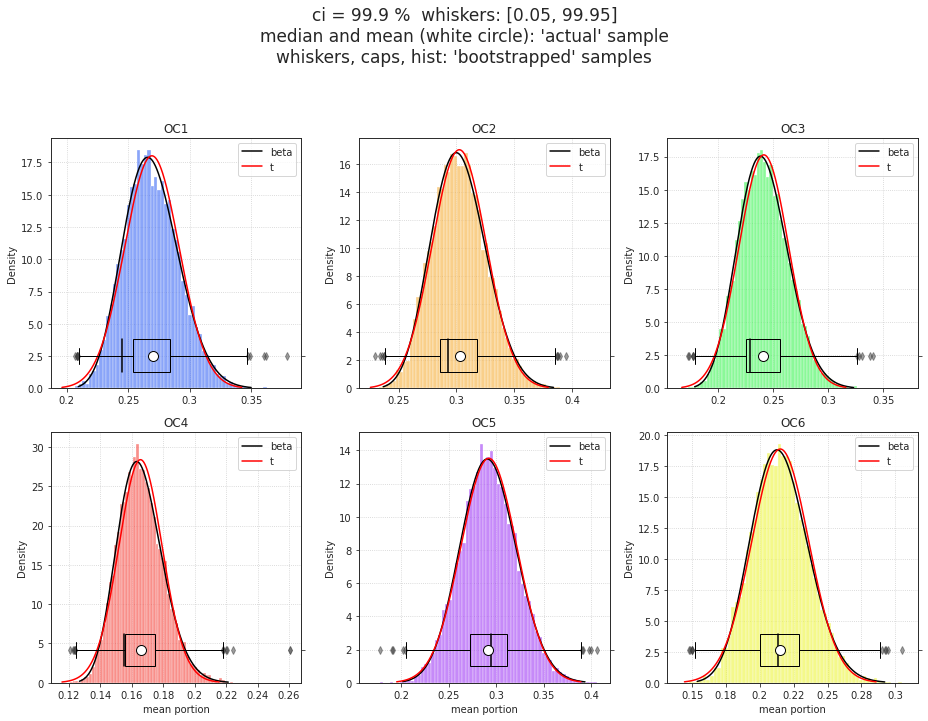

In [27]:
fig

## Integrate out communities

In [28]:
import re

def _extract_seed(x):
    x = next(e for e in str(x).split('-') if 'seed' in e)
    x = re.sub(r"\D", "", x)
    return int(x)

# find shared seeds
seed_counts = {}
seeds_shared = set(range(1, 1000 + 1))
for sub in mice.cfg.sub_ids:
    data_ses = []
    for ses in mice.cfg.ses_ids:
        key = mice.get_key(sub, ses)
        df = output['svinet_all'][key].pi_cut_df
        s = list(map(_extract_seed, df['run']))
        seed_counts[key] = len(set(s))
        seeds_shared.intersection_update(set(s))

In [ ]:
rng = get_rng()
num_cuts = 5
bins = np.linspace(0, 1, num_cuts + 1)
intervals = pd.cut([], bins).value_counts().index
num_nodes = len(svinet.adj)
data_all = np.zeros((
    mice.cfg.num_subjects,
    mice.cfg.num_sessions,
    min(seed_counts.values()),
    num_nodes, num_cuts,
))
for key, sv in tqdm(output['svinet_all'].items()):
    sub, ses, _ = mice.looper[key]
    reord_ids = list(output['perms'][key].values())
    g = sv.gam_all[:, reord_ids, :]
    pi = g / g.sum(1, keepdims=True)
    seed_ids = rng.choice(len(pi), min(seed_counts.values()), False)
    pi = pi[seed_ids]
    for i in range(len(pi)):
        for j in range(num_nodes):
            mem_cut = pd.cut(np.round(pi[i, :, j], 2), bins)
            mem_cut = mem_cut.value_counts()
            counts = mem_cut.values
            portions = [c / sum(counts) for c in counts]
            data_all[sub - 1, ses - 1, i, j] = portions
data_all.shape

  0%|          | 0/30 [00:00<?, ?it/s]